# Data Munging with Pandas

In [55]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as BS
import seaborn as sns

In [19]:
df = pd.read_csv('data/all_compiled.csv', index_col=0)

# Data cleaning & transformation: needed to change remove commas from yardage numbers and convert from object to floats so they will work in calculations.
comma_col = ['RUSH_YD', 'REC_YD', 'PASS_YD']
for col in comma_col:
    df[col] = df[col].str.replace(',','')
    df[col] = df[col].astype(float, errors= 'raise')

#Adding col/series for scoring
df['half_ppr'] = (df['RUSH_YD']+df['REC_YD'])*0.1 + (df['PASS_YD'])*0.04 + (df['RUSH_TD'] + df['REC_TD'])*6 \
    + (df['PASS_TD'])*4 + (df['REC'])*0.5 + (df['FL'])*-2 + df['INTS']*-2
df.head()

,Player,Team,POS,RUSH_ATT,RUSH_YD,RUSH_TD,REC,REC_YD,REC_TD,FL,PASS_ATT,CMP,PASS_YD,PASS_TD,INTS,half_ppr
1,Jonathan Taylor,IND,RB,325.4,1600.3,14.8,42.5,354.3,2.0,2.3,0.0,0.0,0.0,0.0,0.0,312.91
2,Derrick Henry,TEN,RB,366.2,1640.2,13.0,27.4,216.0,0.9,2.0,0.0,0.0,0.0,0.0,0.0,278.72
3,Austin Ekeler,LAC,RB,221.1,984.0,9.4,74.5,665.0,5.3,1.5,0.0,0.0,0.0,0.0,0.0,287.35
4,Christian McCaffrey,CAR,RB,237.4,1057.4,7.6,88.9,757.9,4.1,1.4,0.0,0.0,0.0,0.0,0.0,293.38
5,Joe Mixon,CIN,RB,287.4,1204.2,9.8,47.1,341.9,2.6,1.6,0.0,0.0,0.0,0.0,0.0,249.36


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 1 to 141
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Player    653 non-null    object 
 1   Team      653 non-null    object 
 2   POS       653 non-null    object 
 3   RUSH_ATT  653 non-null    float64
 4   RUSH_YD   653 non-null    float64
 5   RUSH_TD   653 non-null    float64
 6   REC       653 non-null    float64
 7   REC_YD    653 non-null    float64
 8   REC_TD    653 non-null    float64
 9   FL        653 non-null    float64
 10  PASS_ATT  653 non-null    float64
 11  CMP       653 non-null    float64
 12  PASS_YD   653 non-null    float64
 13  PASS_TD   653 non-null    float64
 14  INTS      653 non-null    float64
 15  half_ppr  653 non-null    float64
dtypes: float64(13), object(3)
memory usage: 86.7+ KB


In [22]:
df.sort_values(by='half_ppr', ascending=False).head(15)

,Player,Team,POS,RUSH_ATT,RUSH_YD,RUSH_TD,REC,REC_YD,REC_TD,FL,PASS_ATT,CMP,PASS_YD,PASS_TD,INTS,half_ppr
1,Josh Allen,BUF,QB,116.9,662.3,6.9,0.0,0.0,0.0,3.5,607.5,390.2,4406.1,34.6,13.9,387.474
2,Patrick Mahomes II,KC,QB,66.5,360.0,2.8,0.0,0.0,0.0,2.8,634.6,418.1,4845.1,35.9,11.6,361.404
3,Justin Herbert,LAC,QB,65.1,299.7,3.2,0.0,0.0,0.0,1.4,625.6,415.7,4684.2,33.9,13.3,342.738
4,Lamar Jackson,BAL,QB,158.6,956.7,4.9,0.0,0.0,0.0,3.5,520.2,336.5,3731.3,24.5,13.2,338.922
5,Kyler Murray,ARI,QB,107.3,552.4,5.5,0.0,0.0,0.0,2.3,571.7,384.8,4264.0,27.3,12.3,338.800
6,Jalen Hurts,PHI,QB,144.7,772.8,7.9,0.0,0.0,0.0,2.9,495.1,307.3,3645.1,24.4,12.6,337.084
7,Tom Brady,TB,QB,27.9,45.9,1.7,0.0,0.0,0.0,2.4,652.9,433.9,4846.0,36.3,11.9,325.230
8,Dak Prescott,DAL,QB,55.3,228.9,2.9,0.0,0.0,0.0,4.1,593.8,399.5,4558.9,32.7,11.7,321.846
1,Jonathan Taylor,IND,RB,325.4,1600.3,14.8,42.5,354.3,2.0,2.3,0.0,0.0,0.0,0.0,0.0,312.910
9,Joe Burrow,CIN,QB,46.6,187.4,2.2,0.0,0.0,0.0,1.8,570.0,386.5,4574.1,31.3,12.8,310.904


In [25]:
ADP_HALF_URL = 'https://www.fantasypros.com/nfl/adp/half-point-ppr-overall.php'

res = requests.get(ADP_HALF_URL)

soup = BS(res.content, 'html.parser')

table = soup.find('table', attrs={
    'id': 'data'
})

adp_half_df = pd.read_html(str(table))[0]
adp_half_df.head()

,Rank,Player Team (Bye),POS,Yahoo,Fantrax,FFC,Sleeper,AVG
0,1,Jonathan Taylor IND (14),RB1,1.0,1.0,NaN,1.0,1.0
1,2,Christian McCaffrey CAR (13),RB2,2.0,3.0,NaN,2.0,2.3
2,3,Austin Ekeler LAC (8),RB3,3.0,2.0,NaN,4.0,3.0
3,4,Cooper Kupp LAR (7),WR1,4.0,4.0,NaN,5.0,4.3
4,5,Derrick Henry TEN (6),RB4,6.0,5.0,NaN,3.0,4.7


In [34]:
#clean player team bye col
adp_half_df['Player'] = adp_half_df['Player Team (Bye)'].apply(lambda x: ' '.join(x.split(' ')[:-2]))
adp_half_df['Team'] = adp_half_df['Player Team (Bye)'].apply(lambda x: x.split()[-2])
adp_half_df['POS_Rank'] = adp_half_df['POS']
adp_half_df['POS'] = adp_half_df['POS'].str[:2]
adp_half_df.head()

,Rank,Player Team (Bye),POS,Yahoo,Fantrax,FFC,Sleeper,AVG,Player,Team,POS_Rank
0,1,Jonathan Taylor IND (14),RB,1.0,1.0,NaN,1.0,1.0,Jonathan Taylor,IND,RB1
1,2,Christian McCaffrey CAR (13),RB,2.0,3.0,NaN,2.0,2.3,Christian McCaffrey,CAR,RB2
2,3,Austin Ekeler LAC (8),RB,3.0,2.0,NaN,4.0,3.0,Austin Ekeler,LAC,RB3
3,4,Cooper Kupp LAR (7),WR,4.0,4.0,NaN,5.0,4.3,Cooper Kupp,LAR,WR1
4,5,Derrick Henry TEN (6),RB,6.0,5.0,NaN,3.0,4.7,Derrick Henry,TEN,RB4


In [83]:
adp_half_df2 = adp_half_df.loc[:, ['Player', 'Team', 'POS', 'Rank', 'AVG']]
adp_half_df2.head()

,Player,Team,POS,Rank,AVG
0,Jonathan Taylor,IND,RB,1,1.0
1,Christian McCaffrey,CAR,RB,2,2.3
2,Austin Ekeler,LAC,RB,3,3.0
3,Cooper Kupp,LAR,WR,4,4.3
4,Derrick Henry,TEN,RB,5,4.7


In [37]:
# Capping list for finding VOR at top 100 players

adp_cutoff = 100
adp_cutoff_df = adp_half_df2.sort_values(by='Rank')[:adp_cutoff]
adp_cutoff_df = adp_cutoff_df.merge(df.loc[:,['Player', 'Team', 'POS', 'half_ppr']], on=['Player', 'Team', 'POS'])
adp_cutoff_df.head()

,Player,Team,POS,Rank,half_ppr
0,Jonathan Taylor,IND,RB,1,312.91
1,Christian McCaffrey,CAR,RB,2,293.38
2,Austin Ekeler,LAC,RB,3,287.35
3,Cooper Kupp,LAR,WR,4,297.66
4,Derrick Henry,TEN,RB,5,278.72


In [39]:
replacement_values = {}
for _, row in adp_cutoff_df.iterrows():
    replacement_values[row['POS']] = row['half_ppr']

replacement_values

{'RB': 141.06,
 'WR': 146.14000000000001,
 'TE': 126.64999999999999,
 'QB': 302.67}

In [41]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RUSH_ATT,653.0,23.217152,55.626424,0.0,0.00,0.20,10.20,366.200
RUSH_YD,653.0,104.194181,247.435433,-2.5,0.00,0.60,56.90,1640.200
RUSH_TD,653.0,0.805819,1.957649,0.0,0.00,0.00,0.50,14.800
REC,653.0,20.103063,24.724452,0.0,3.00,8.80,30.90,123.000
REC_YD,653.0,225.255743,303.823156,0.0,26.50,84.10,312.30,1599.700
REC_TD,653.0,1.460031,2.046030,0.0,0.10,0.60,2.00,12.400
FL,653.0,0.413323,0.716281,0.0,0.00,0.10,0.50,5.000
PASS_ATT,653.0,28.830475,117.286384,0.0,0.00,0.00,0.00,652.900
CMP,653.0,18.655743,76.293640,0.0,0.00,0.00,0.00,433.900
PASS_YD,653.0,209.161103,852.873071,0.0,0.00,0.00,0.00,4846.000


In [44]:
from dataclasses import replace

vor_df = df.loc[:, ['Player', 'Team', 'POS', 'half_ppr']].rename({'POS': 'Position'}, axis=1)
vor_df['VOR'] = vor_df.apply(lambda row: row['half_ppr'] - replacement_values[row['Position']], axis=1)
vor_df.head()

,Player,Team,Position,half_ppr,VOR
1,Jonathan Taylor,IND,RB,312.91,171.85
2,Derrick Henry,TEN,RB,278.72,137.66
3,Austin Ekeler,LAC,RB,287.35,146.29
4,Christian McCaffrey,CAR,RB,293.38,152.32
5,Joe Mixon,CIN,RB,249.36,108.30


In [62]:
vor_df['VOR Rank'] = vor_df['VOR'].rank(ascending=False)
vor_df.sort_values(by='VOR', ascending=False).head(50)

,Player,Team,Position,half_ppr,VOR,VOR Rank
1,Jonathan Taylor,IND,RB,312.910,171.850,1.0
4,Christian McCaffrey,CAR,RB,293.380,152.320,2.0
1,Cooper Kupp,LAR,WR,297.660,151.520,3.0
3,Austin Ekeler,LAC,RB,287.350,146.290,4.0
2,Derrick Henry,TEN,RB,278.720,137.660,5.0
3,Justin Jefferson,MIN,WR,260.280,114.140,6.0
2,Ja'Marr Chase,CIN,WR,255.590,109.450,7.0
7,Alvin Kamara,NO,RB,249.540,108.480,8.0
5,Joe Mixon,CIN,RB,249.360,108.300,9.0
8,Najee Harris,PIT,RB,243.990,102.930,10.0


In [53]:
vor_df.loc[vor_df['Position']  == 'RB'].sort_values(by='VOR', ascending=False).head(15)

,Player,Team,Position,half_ppr,VOR
1,Jonathan Taylor,IND,RB,312.91,171.85
4,Christian McCaffrey,CAR,RB,293.38,152.32
3,Austin Ekeler,LAC,RB,287.35,146.29
2,Derrick Henry,TEN,RB,278.72,137.66
7,Alvin Kamara,NO,RB,249.54,108.48
5,Joe Mixon,CIN,RB,249.36,108.30
8,Najee Harris,PIT,RB,243.99,102.93
6,Dalvin Cook,MIN,RB,242.84,101.78
9,Leonard Fournette,TB,RB,232.95,91.89
12,Aaron Jones,GB,RB,227.12,86.06


In [64]:
vor_df.groupby('Position')['VOR'].describe()

,count,mean,std,min,25%,50%,75%,max
Position,,,,,,,,
QB,91.0,-197.942110,130.019364,-302.67,-295.2080,-288.284,-59.635,84.804
RB,170.0,-69.686235,78.310654,-141.06,-128.1575,-104.645,-31.915,171.850
TE,141.0,-83.519433,46.231120,-126.65,-115.0800,-102.450,-68.120,95.830
WR,251.0,-79.115179,68.810165,-146.14,-135.1750,-114.080,-31.845,151.520


### Normalizing VOR

In [65]:
vor_df['VOR_norm'] = vor_df['VOR'].apply(lambda x: (x - vor_df['VOR'].min()) / (vor_df['VOR'].max() - vor_df['VOR'].min()))

In [67]:
vor_df = vor_df.sort_values(by='VOR Rank')
vor_df.head()

,Player,Team,Position,half_ppr,VOR,VOR Rank,VOR_norm
1,Jonathan Taylor,IND,RB,312.91,171.85,1.0,1.000000
4,Christian McCaffrey,CAR,RB,293.38,152.32,2.0,0.958843
1,Cooper Kupp,LAR,WR,297.66,151.52,3.0,0.957157
3,Austin Ekeler,LAC,RB,287.35,146.29,4.0,0.946135
2,Derrick Henry,TEN,RB,278.72,137.66,5.0,0.927948


In [68]:
# setting draft pool conditions for Wells leage
num_teams = 12
roster_size = 16
draft_pool = num_teams * roster_size

vor_copy = vor_df[:draft_pool]

<AxesSubplot:xlabel='Position', ylabel='VOR'>

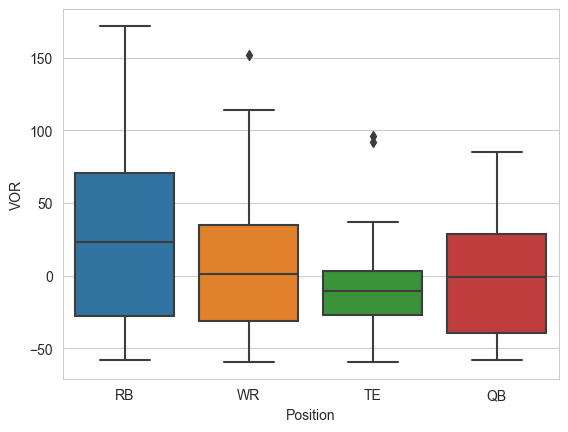

In [72]:
sns.boxplot(x=vor_copy['Position'], y=vor_copy['VOR'])

In [84]:
# vor_df = vor_df.rename({'Position': 'POS'}, axis=1)
# vor_df.head()
final_df = vor_df.merge(adp_half_df2, how='left', on=['Player', 'POS', 'Team'])
final_df.head()

,Player,Team,POS,half_ppr,VOR,VOR Rank,VOR_norm,Rank,AVG
0,Jonathan Taylor,IND,RB,312.91,171.85,1.0,1.000000,1.0,1.0
1,Christian McCaffrey,CAR,RB,293.38,152.32,2.0,0.958843,2.0,2.3
2,Cooper Kupp,LAR,WR,297.66,151.52,3.0,0.957157,4.0,4.3
3,Austin Ekeler,LAC,RB,287.35,146.29,4.0,0.946135,3.0,3.0
4,Derrick Henry,TEN,RB,278.72,137.66,5.0,0.927948,5.0,4.7


In [85]:
final_df = final_df.rename({'half_ppr': 'FantasyPoints', 'VOR_norm': 'Value', 'VOR Rank': 'ValueRank', 'Rank': 'ADP Rank', 'AVG': 'ADP AVG'}, axis= 1)
final_df.head()

,Player,Team,POS,FantasyPoints,VOR,ValueRank,Value,ADP Rank,ADP AVG
0,Jonathan Taylor,IND,RB,312.91,171.85,1.0,1.000000,1.0,1.0
1,Christian McCaffrey,CAR,RB,293.38,152.32,2.0,0.958843,2.0,2.3
2,Cooper Kupp,LAR,WR,297.66,151.52,3.0,0.957157,4.0,4.3
3,Austin Ekeler,LAC,RB,287.35,146.29,4.0,0.946135,3.0,3.0
4,Derrick Henry,TEN,RB,278.72,137.66,5.0,0.927948,5.0,4.7


In [86]:
# calculate differenct between VOR ValueRank and ADP Rank
from typing import final


final_df['VOR_ADP Rank Diff'] = final_df['ADP Rank'] - final_df['ValueRank']
final_df.head()

,Player,Team,POS,FantasyPoints,VOR,ValueRank,Value,ADP Rank,ADP AVG,VOR_ADP Rank Diff
0,Jonathan Taylor,IND,RB,312.91,171.85,1.0,1.000000,1.0,1.0,0.0
1,Christian McCaffrey,CAR,RB,293.38,152.32,2.0,0.958843,2.0,2.3,0.0
2,Cooper Kupp,LAR,WR,297.66,151.52,3.0,0.957157,4.0,4.3,1.0
3,Austin Ekeler,LAC,RB,287.35,146.29,4.0,0.946135,3.0,3.0,-1.0
4,Derrick Henry,TEN,RB,278.72,137.66,5.0,0.927948,5.0,4.7,0.0


In [94]:
wells_draft_pool = final_df.sort_values(by='ADP Rank')[:draft_pool]

wells_rb_draft_pool = wells_draft_pool.loc[wells_draft_pool['POS'] == 'RB']
wells_qb_draft_pool = wells_draft_pool.loc[wells_draft_pool['POS'] == 'QB']
wells_wr_draft_pool = wells_draft_pool.loc[wells_draft_pool['POS'] == 'WR']
wells_te_draft_pool = wells_draft_pool.loc[wells_draft_pool['POS'] == 'TE']


In [96]:
# wells_draft_pool.sort_values(by='VOR_ADP Rank Diff', ascending=False).head()
wells_rb_draft_pool.sort_values(by='VOR_ADP Rank Diff', ascending=False)[:10]

,Player,Team,POS,FantasyPoints,VOR,ValueRank,Value,ADP Rank,ADP AVG,VOR_ADP Rank Diff
60,Tony Pollard,DAL,RB,169.74,28.68,61.0,0.698285,87.0,87.3,26.0
34,J.K. Dobbins,BAL,RB,194.04,52.98,35.0,0.749494,60.0,62.0,25.0
49,Miles Sanders,PHI,RB,177.36,36.30,50.0,0.714343,73.0,74.3,23.0
45,Damien Harris,NE,RB,179.77,38.71,46.0,0.719422,63.0,64.0,17.0
151,Jamaal Williams,DET,RB,105.18,-35.88,152.0,0.562231,168.0,170.7,16.0
69,Cordarrelle Patterson,ATL,RB,163.90,22.84,70.0,0.685977,81.0,82.0,11.0
20,James Conner,ARI,RB,223.01,81.95,21.0,0.810545,31.0,30.3,10.0
82,Rhamondre Stevenson,NE,RB,154.67,13.61,83.0,0.666526,93.0,94.3,10.0
7,Alvin Kamara,NO,RB,249.54,108.48,8.0,0.866455,17.0,17.7,9.0
67,Devin Singletary,BUF,RB,164.75,23.69,68.0,0.687769,77.0,77.7,9.0


In [ ]:
sleeper_wr = wells_wr_draft_pool[:40]
sleeper_wr.sort_values(by='VOR_ADP Rank Diff', ascending=False)